In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

doctors = pd.read_csv('doctors.csv')
operations = pd.read_csv('operations.csv')
patients = pd.read_csv('patients.csv')
appointments1 = pd.read_csv('appointments.csv')
appointments2 = pd.read_csv('appointments2.csv')


print(doctors)

print(operations)   

print(patients)

print(appointments1)

print(appointments2)

appointments = pd.concat([appointments1, appointments2], ignore_index=True)



   id    Лікар
0   1   Іванов
1   2   Петров
2   3  Сидоров
   id         Назва  Ціна
0   1        Чистка   300
1   2   Пломбування   500
2   3  Протезування  2000
   id   Пацієнт  Народження
0   1  Миколаїв  2005-05-10
1   2  Іваненко  1980-12-24
2   3   Семенов  1945-07-19
         date  пацієнт_id  лікар_id  операція_id  кількість
0  2024-01-10           1         1            2          1
1  2024-01-15           2         2            1          2
2  2024-01-20           3         3            3          1
         date  пацієнт_id  лікар_id  операція_id  кількість
0  2024-01-11           1         1            2          1
1  2024-01-17           2         2            2          2
2  2024-01-21           3         3            2          2


In [3]:
birthdate = patients['Народження']

patients['вік'] = datetime.now().year - pd.to_datetime(birthdate).dt.year
patients.drop('Народження', axis=1, inplace=True) 
print(patients)

   id   Пацієнт  вік
0   1  Миколаїв   19
1   2  Іваненко   44
2   3   Семенов   79


In [4]:
data2 = pd.merge(doctors, appointments, left_on='id', right_on='лікар_id', how='inner')

data1 = pd.merge(operations, data2, left_on='id', right_on='операція_id', how='inner')

data1 =pd.merge(operations, data2, left_on='id', right_on='операція_id', how='inner')


data = pd.merge(patients, data1, left_on='id', right_on='пацієнт_id', how='inner')

# print(data)
data.drop(['id_x','id_y','пацієнт_id','лікар_id','операція_id'], axis=1, inplace=True) 

data = data[['Лікар', 'Пацієнт','вік' ,'Назва', 'Ціна','кількість', 'date']]
print(data)

     Лікар   Пацієнт  вік         Назва  Ціна  кількість        date
0   Іванов  Миколаїв   19   Пломбування   500          1  2024-01-10
1   Іванов  Миколаїв   19   Пломбування   500          1  2024-01-11
2   Петров  Іваненко   44        Чистка   300          2  2024-01-15
3   Петров  Іваненко   44   Пломбування   500          2  2024-01-17
4  Сидоров   Семенов   79   Пломбування   500          2  2024-01-21
5  Сидоров   Семенов   79  Протезування  2000          1  2024-01-20


In [5]:
def calculate():
    data['Дохід'] = data['Ціна'] * data['кількість']
    filtred = data.groupby('Лікар')['Дохід'].sum().reset_index()
    print(filtred)
    # data.drop('Дохід', axis=1, inplace=True) 

calculate()

     Лікар  Дохід
0   Іванов   1000
1   Петров   1600
2  Сидоров   3000


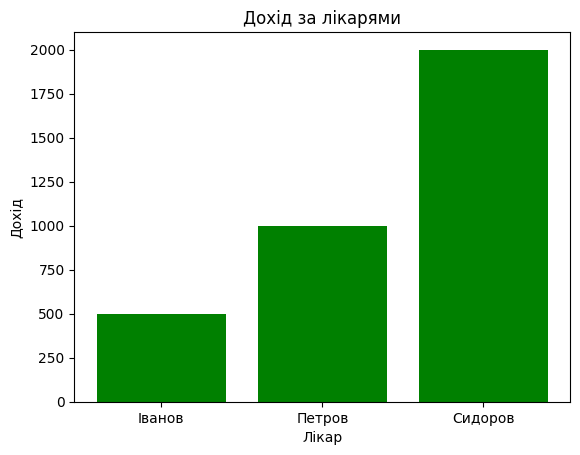

In [6]:
def bar_graph():
    plt.bar(data['Лікар'], data['Дохід'], color='green') 
    plt.xlabel('Лікар')
    plt.ylabel('Дохід')
    plt.title('Дохід за лікарями')
    plt.show()
bar_graph()

In [9]:
df = pd.read_csv('doctors.csv')

class DOCTOR:
    def __init__(self,id,surname):
        self._id=id
        self._surname=surname

    @property
    def id(self):
        return self._id
    
    @id.setter
    def id(self,value):
        self._id=value

    @property
    def surname(self):
        return self._surname
    
    @surname.setter
    def surname(self,value):
        self._surname=value

doctor = [DOCTOR(row['id'], row['Лікар']) for _, row in df.iterrows()]
for d in doctor:
    print(f'ID: {d.id}, surname: {d.surname}')

ID: 1, surname: Іванов
ID: 2, surname: Петров
ID: 3, surname: Сидоров


In [10]:
import unittest

class TestDoctor(unittest.TestCase):
    def setUp(self):
        self.doctor = DOCTOR(1, 'Joe')
    def test_get_id(self):
        self.assertEqual(self.doctor.id,1)
    def test_get_surname(self):
        self.assertEqual(self.doctor.surname,'Joe')
    def test_set_id(self):
        self.doctor.id = 2
        self.assertEqual(self.doctor.id,2)
    def test_set_surname(self):
        self.doctor.surname = 'Paul'
        self.assertEqual(self.doctor.surname, 'Paul')
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK
